data_academic_performance = De La Hoz, Enrique (2020), “Data of Academic Performance evolution for Engineering Students”, Mendeley Data, V1, doi: 10.17632/83tcx8psxv.1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
import scipy.stats as stats
from scipy.stats import kurtosis, skew
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [181]:
#data=df[['writing score']]#,'Part 2','insem (80)']]
#data.rename(columns={'writing score':'Marks'},inplace=True)
def remove_outliers(df):
    
    
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    m1=Q1 - (1.5 * IQR)
    m2=Q3 + (1.5 * IQR)
    print(Q1,Q3,IQR,m1,m2)
    df2=df[((df > (Q1 - 1.5 * IQR)) & (df < (Q3 + 1.5 * IQR)))]
    print(df2.head())
    sns.boxplot(df2)
    plt.show()
    df2=df2[~np.isnan(df2)]
    df2=df2.dropna()
    df2= df2[np.isfinite(df2)]

    return df2
    

In [3]:
def test_emperical_rule(df):
    N=len(df)
    lo=interval68=interval95=interval997=0
    for i in range(N):
        if(df[i]<in_997[0]):
            lo+=1
        elif(df[i]<in_95[0]):
            interval997+=1
        elif(df[i]<in_68[0]):
            interval95+=1
        elif(df[i]<in_68[1]):
            interval68+=1
        elif(df[i]<in_95[1]):
            interval95+=1
        elif(df[i]<in_997[1]):
            interval997+=1
    interval95+=interval68
    interval997+=interval95
    print(interval68/N,interval95/N,interval997/N)

In [11]:
def make_pdf_cdf(n_equal_bins,df_temp,attr):
    freq , bins= np.histogram(df_temp[attr],bins=n_equal_bins) 
    
    norm_freq=pd.Series(freq/freq.sum())#normalizing the frequencies
    cumulative_freq=[];
    cumulative_freq.append(norm_freq[0]);
    for i in range(1,len(norm_freq)):
        cumulative_freq.append(norm_freq[i]+cumulative_freq[i-1]);

    cumulative_freq=pd.Series(cumulative_freq);#The frequencies in CDF plot
    freq=pd.Series(freq)
    bins=pd.Series(bins)
    fig = plt.figure()
    
    fig, axs = plt.subplots(1,2,figsize =(18, 5)) 
    N, bins, patches=axs[0].hist(df_temp[attr],color="pink",edgecolor="black", 
                                    bins=bins,weights=np.zeros_like(df_temp[attr]) + 1. / len(df_temp[attr]),)
    axs[0].set_xlabel(attr)
    axs[0].set_ylabel('Normalized Frequency');
    axs[0].set_title('PDF of '+ attr +' with Bins='+str(n_equal_bins))
    axs[0].grid()
    frame={'freq':cumulative_freq, 'bins':freq}
    temp_df=pd.DataFrame(frame)

    
    N, bins, patches=axs[1].hist(df_temp[attr],color="purple",edgecolor="black", bins=bins,weights=np.zeros_like(df_temp[attr]) + 1. / len(df_temp[attr]),cumulative=1)
    axs[1].set_xlabel(attr)
    axs[1].set_ylabel('Normalized Frequency');
    axs[1].set_title('CDF of '+attr+ ' with Bins='+str(n_equal_bins))
    axs[1].grid()
    return norm_freq,cumulative_freq


    

In [5]:
import scipy.stats as st
def get_best_distribution(df):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme",'genlogistic','gumbel_l','lognorm']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(df)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print('\n')
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return params[best_dist]

In [6]:
def normalize(df):
    df=(df-df.mean())/df.std()
    print(df.describe())
    return df
    

In [139]:
data=pd.read_excel('result1.xlsx')
print(data.head())
data2=data


   Sr. No.      Marks
0        1  46.323529
1        2  18.382353
2        3  56.617647
3        4  86.764706
4        5  85.294118


In [182]:
attr='Marks'
data=data2[[attr]]

In [183]:
data=data[~np.isnan(data)]

data=data.dropna()

data = data[np.isfinite(data)]


In [184]:
data.head()

,Marks
0,46.323529
1,18.382353
2,56.617647
3,86.764706
4,85.294118


Marks    58.639706
Name: 0.25, dtype: float64 Marks    83.088235
Name: 0.75, dtype: float64 Marks    24.448529
dtype: float64 Marks    21.966912
dtype: float64 Marks    119.761029
dtype: float64
       Marks
0  46.323529
1        NaN
2  56.617647
3  86.764706
4  85.294118


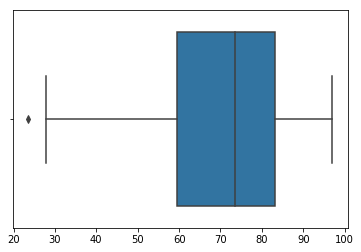

       Marks
0  46.323529
2  56.617647
3  86.764706
4  85.294118
5  92.647059


In [185]:
data3=remove_outliers(data)
print(data3.head())

In [186]:
data=normalize(data)

              Marks
count  3.320000e+02
mean  -9.637538e-16
std    1.000000e+00
min   -3.466815e+00
25%   -5.658846e-01
50%    2.644170e-01
75%    7.974502e-01
max    1.576499e+00


Mean:  Marks   -9.637538e-16
dtype: float64  STD:  Marks    1.0
dtype: float64
68% =  [[-1.]
 [ 1.]]
95% =  [[-2.]
 [ 2.]]
99.7% =  [[-3.]
 [ 3.]]


<Figure size 432x288 with 0 Axes>

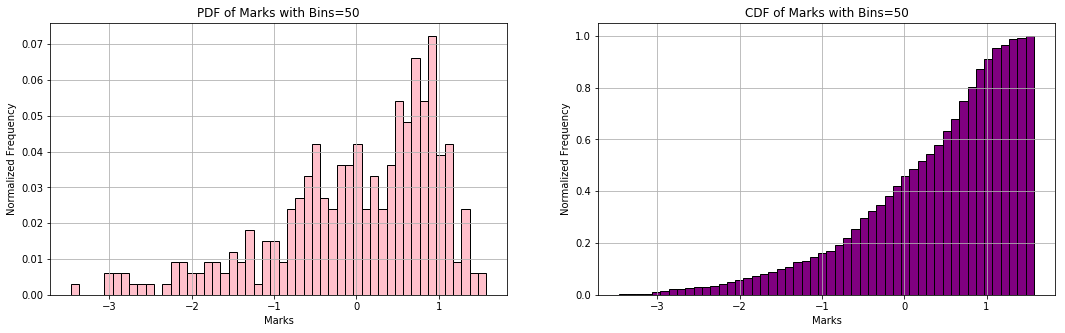

In [187]:
pdf,cdf=make_pdf_cdf(50,data,attr)
mu=data.mean()
sigma=data.std()
print('Mean: ',mu ,' STD: ',sigma)
in_68 = np.array([mu-sigma,mu+sigma])
in_95 = np.array([mu-2*sigma,mu+2*sigma])
in_997 = np.array([mu-3*sigma,mu+3*sigma])
print('68% = ',in_68)
print('95% = ',in_95)
print('99.7% = ',in_997)

In [188]:
data=data[attr]

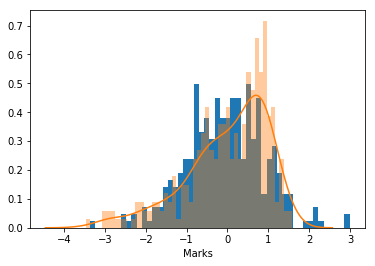

In [204]:
s= np.random.normal(mu, sigma, len(data))

#count , bins , ignored=
plt.hist(s,bins=50,density=True,linewidth=2)

# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#          linewidth=2, color='r')
sns.distplot(data,bins=50)

In [205]:
test_emperical_rule(data)
print(kurtosis(data),skew(data))

0.7259036144578314 0.9427710843373494 0.9909638554216867
0.6441438976407805 -1.00336261424203


In [206]:
params=get_best_distribution(data)

p value for norm = 0.0007027507878305528
p value for exponweib = 0.0026424214029605597
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 0.0
p value for genextreme = 0.20098633365081175
p value for genlogistic = 8.712865648230483e-05
p value for gumbel_l = 0.056113802942989066
C:\Users\Pratvi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
p value for lognorm = 0.0006688546972459797


Best fitting distribution: genextreme
Best p value: 0.20098633365081175
Parameters for the best fit: (0.5970897621301821, -0.19565817634915025, 1.071433093569961)


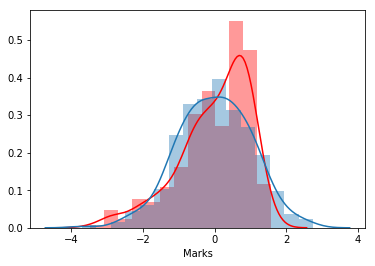

In [217]:
sns.distplot(data,color='r')
sns.distplot(np.random.normal(size=len(data)))


In [39]:
params=np.array(params)

In [40]:
# rv=exponweib(a=params[0],c=params[1],loc=params[2],scale=params[3])
# plt.plot(rv)
# x = np.linspace(0, np.minimum(rv.dist.b, 3))
# h = plt.plot(x, rv.pdf(x))
a=params[0]
c=params[1]
x = np.linspace(-4,4)
rv = exponweib(a, c,loc=params[2],scale=params[3])
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
sns.distplot(data)
sns.distplot(np.random.normal(size=len(data)))

NameError: name 'exponweib' is not defined